In [1]:
import vmodel
import os
import numpy as np
import h5py
import datetime
import scipy.spatial
import math
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn as sns; sns.set_theme()
import pandas as pd
from matplotlib.colors import LogNorm, Normalize
from matplotlib.ticker import FormatStrFormatter
plt.style.use('default')


In [10]:
A = np.array([ 2, -1])

theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c,-s), (s, c)))

A = np.dot(R, A)
print(A)

[1. 2.]


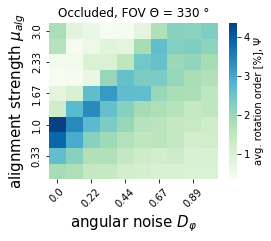

In [4]:
mill = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")
steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.8] = 0
mill_abs[mill_abs>0.8] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))


df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, FOV Θ = 330 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill5_straight_occ_dphi.pdf",bbox_inches="tight")

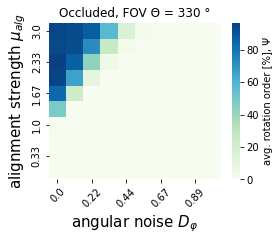

In [2]:
mill = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")
#mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_occ_mill5_straight_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.7] = 0
mill_abs[mill_abs>0.7] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))


df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, FOV Θ = 330 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_occ_straight_dphi.pdf",bbox_inches="tight")

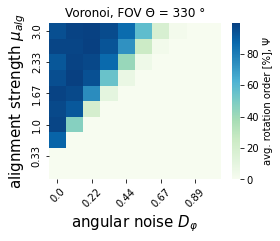

In [6]:
steps = 10
reps = 20
#mill = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_mill3_astr_dphi.npy")
#mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_quick_mill_astr_dphi.npy")
mill = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_pol_astr_dphi.npy")





paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.5] = 0
mill_abs[mill_abs>=0.5] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 330 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_vor_dphi.pdf",bbox_inches="tight")

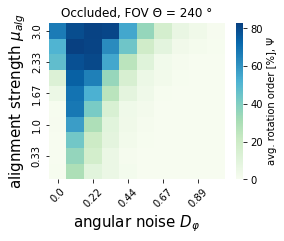

In [4]:
mill = np.load("/home/lars/vmodel_output/longsim_visprey240v2_dphi_astr_occ_Col_pol_astr_dphi.npy")

#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.7] = 0
mill_abs[mill_abs>=0.7] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")#, norm=LogNorm())

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, FOV Θ = 240 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_occ_straight_dphi_240.pdf",bbox_inches="tight")

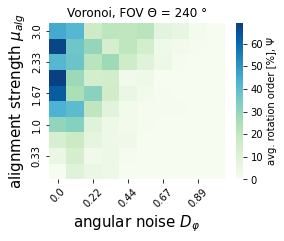

In [5]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_preyvis240v2_dphi_astr_vor_pol_astr_dphi.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.7] = 0
mill_abs[mill_abs>=0.7] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 240 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_vor_dphi_240.pdf",bbox_inches="tight")

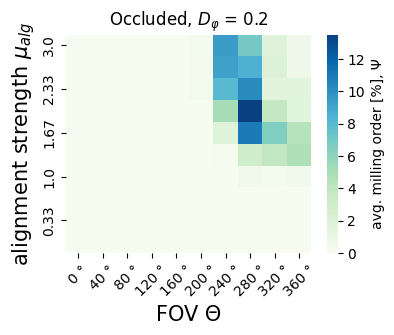

In [70]:
mill = np.load("/home/lars/vmodel_output/longsim_preyvis_astr_mill_astr_visPrey.npy")


steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.7] = 0
mill_abs[mill_abs>=0.7] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))
steps = 10
reps = 20





xticks = []



paraChange2_val = paraChange2_val.astype(int)
for i in range(steps):
    xticks.append(str(paraChange2_val[i])+" °")



df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = xticks, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("FOV Θ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, $D_{φ}$ = 0.2")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("HM_mill_occ_straight_vis.pdf",bbox_inches="tight")

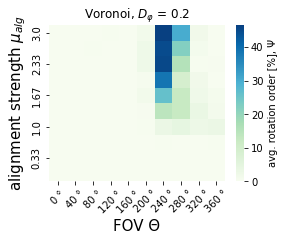

In [3]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_visPrey_astr_vor_mill_astr_visPrey.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)
mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.7] = 0
mill_abs[mill_abs>=0.7] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

steps = 10
reps = 20


xticks = []

paraChange2_val = paraChange2_val.astype(int)
for i in range(steps):
    xticks.append(str(paraChange2_val[i])+" °")





df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = xticks, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("FOV Θ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, $D_{φ}$ = 0.2")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("HM_mill_vor_vis.pdf",bbox_inches="tight")

In [ ]:
#################################################################################################
# EXTRAS
#################################################################################################

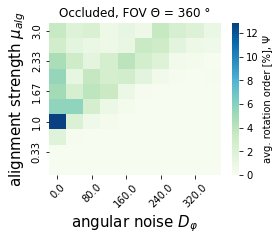

In [35]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_occ_vis360_mill4_astr_dphi.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)
mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    
#mill_time_full[mill_time_full == np.max(mill_time_full)] = 0.04
df = pd.DataFrame(np.flip(mill_time_full, axis = 0))


df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu") #, vmax = 12)


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, FOV Θ = 360 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_360_occ_dphi.pdf",bbox_inches="tight")

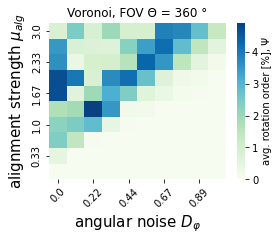

In [17]:
steps = 10
reps = 20
#mill = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_mill3_astr_dphi.npy")
#mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_quick_mill_astr_dphi.npy")
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_vis360_mill4_astr_dphi.npy")





paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu") #, vmax = 12)


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, FOV Θ = 360 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_360_vor_dphi.pdf",bbox_inches="tight")

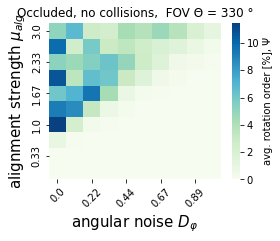

In [20]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_v2_astr_occ_Nocol_mill4_astr_dphi.npy")
#mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_occ_mill5_straight_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>0.4] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))


df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]

#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, no collisions,  FOV Θ = 330 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_occ_straight_nocol_dphi.pdf",bbox_inches="tight")

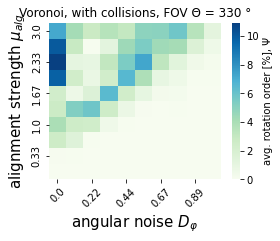

In [36]:
steps = 10
reps = 20
#mill = np.load("/home/lars/vmodel_output/longsim_dphi_astr_vor_mill3_astr_dphi.npy")
#mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_astr_vor_quick_mill_astr_dphi.npy")
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_dphi_v2_astr_vor_col_mill4_astr_dphi.npy")





paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,1,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    
#mill_time_full[mill_time_full == np.max(mill_time_full)] = 0.1
df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = 2, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu") #,vmax = 10)


plt.gcf().set_size_inches(4,3.45)
plt.xlabel("angular noise $D_{φ}$", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, with collisions, FOV Θ = 330 °")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("HM_mill_vor_col_dphi.pdf",bbox_inches="tight")

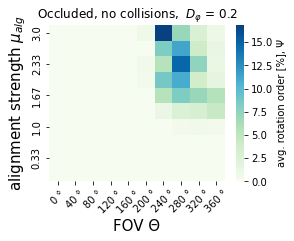

In [38]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_visPrey_v2_astr_occ_nocol_mill4_astr_visPrey.npy")


steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)

mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))
steps = 10
reps = 20





xticks = []



paraChange2_val = paraChange2_val.astype(int)
for i in range(steps):
    xticks.append(str(paraChange2_val[i])+" °")



df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = xticks, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("FOV Θ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Occluded, no collisions,  $D_{φ}$ = 0.2")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("HM_mill_occ_straight_nocol_vis.pdf",bbox_inches="tight")

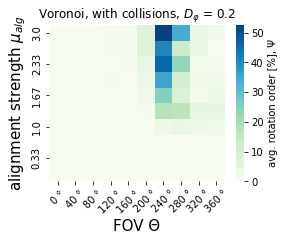

In [39]:
mill = np.load("/home/lars/vmodel_output/longsim_data/longsim_visPrey_v2_astr_vor_col_mill4_astr_visPrey.npy")
#pol = np.load("/home/lars/vmodel_output/test_mill_longsim_pol_astr_dphi.npy")

steps = 10
reps = 20


paraChange1_val = np.linspace(0,3,steps)
paraChange2_val = np.linspace(0,360,steps)
mill_time_full = np.zeros((steps,steps))

mill_abs = abs(mill[:,:,:,1:])
times = len(mill_abs[0,0,0,:])

mill_abs[mill_abs<0.4] = 0
mill_abs[mill_abs>=0.4] = 1

for i in range(len(paraChange1_val)):
    
    for j in range(len(paraChange2_val)):
    
        mill_time = 0
        

        
        for rep in range(reps):
            
            mill_time += (np.sum(mill_abs[i,j,rep,:]/times))
            
        mill_time_full[i,j] = mill_time/reps
            
            
    

df = pd.DataFrame(np.flip(mill_time_full, axis = 0))

steps = 10
reps = 20


xticks = []

paraChange2_val = paraChange2_val.astype(int)
for i in range(steps):
    xticks.append(str(paraChange2_val[i])+" °")





df.columns = np.round(paraChange2_val,2)
df.index = np.round(paraChange1_val,2)[::-1]


#plt.title(figname, fontsize = 12, pad = 20) # title with fontsize 20
ax = sns.heatmap(df*100, yticklabels = 2, xticklabels = xticks, cbar_kws={'label': "avg. rotation order [%], Ψ"},
                 cmap="GnBu")

plt.tight_layout()
plt.gcf().set_size_inches(4,3.45)
plt.xlabel("FOV Θ", fontsize = 15) # x-axis label with fontsize 15
plt.ylabel("alignment strength " + u'$μ_{alg}$', fontsize = 15) # y-axis label with fontsize 15
plt.title("Voronoi, with collisions, $D_{φ}$ = 0.2")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.savefig("HM_mill_vor_col_vis.pdf",bbox_inches="tight")